# Hidden CKD

#### Variables
- Date of event: Date of the screening
- Gender: Gender of the patient (M: Male, F: Female)
- Ethnicity: The ethnicity of the participant
- D.O.B.: The date of birth of the participant
- Age: Age of the patient (years)
- Height (cm): Height of the participant in cm
- Weight (kg): Weight of the participant in kg
- BMI: BMI of the participant
- BMI Category: Classification of the particpant BMI according to NICE guidelines
- Systolic, Diastolic: The systolic and diastolic of the partcipants
- BP Category: Classification of the particpant BP according to NICE guidelines
- Medical Conditions: Medical conditions the patient has (High blood pressure, Diabetes, Kidney disease, Heart disease and Other
- What medications/tablets are you currently taking?: The kinds of medication the participants are taking (Cholesterol, BP, Diabetes, Other)
- Name of blood pressure medication / Tablets
- Name of blood pressure medication / Tablets
- Name of blood pressure medication / Tablets
- Do you have a family history of kidney disease?: Whether or not the participant has a family history of kidney disease
- uACR: uACR level of the participant (Normal, Abnormal, High Abnormal)

In [1]:
import numpy as np
import pandas as pd

In [2]:
raw_data=pd.read_csv('HIDDEN CKD Full Data.csv')

# **Cleaning and Preprocessing Raw Data**

In [3]:
#filtering out all rows with uACR results that are not Normal, Abnormal or High Abnormal
raw_data = raw_data[(raw_data['uACR'] == "Normal") | (raw_data['uACR'] == "Abnormal") | (raw_data['uACR'] == "High abnormal")]

In [4]:
#renaming specific row values
raw_data['uACR']=raw_data['uACR'].replace({'High abnormal': 'High Abnormal'})
raw_data['Ethnicity'] = raw_data['Ethnicity'].replace({'Black African ' : 'Black African (unspecified)',
                                                       'Black African' : 'Black African (unspecified)'})

In [5]:
#adding an "Abnormal uACR" column
raw_data['Abnormal_uACR'] = raw_data['uACR'].map({'Normal' : 0, 'Abnormal' : 1, 'High Abnormal' : 1}).astype('bool')

In [6]:
#adding a "Simplified Ethnicity" column
raw_data['Simplified_Ethnicity'] = raw_data['Ethnicity'].replace({
    'Black African' : 'Black',
    'Black African (Central Africa)' : 'Black',
    'Black African (East Africa)' : 'Black',
    'Black African (North Africa)' : 'Black',
    'Black African (South Africa)' : 'Black',
    'Black African (West Africa)' : 'Black',
    'Black African (unspecified)' : 'Black',
    'Black Caribbean' : 'Black',
    'Black other' : 'Black',
    'Indian' : 'Indian',
    'Mixed White/Asian' : 'Mixed',
    'Mixed White/Black African' : 'Mixed',
    'Mixed White/Black Caribbean' : 'Mixed',
    'Mixed other' : 'Mixed',
    'Pakistani' : 'Indian',
    'White British' : 'White',
    'White Gypsy/Traveller' : 'White',
    'White Irish' : 'White',
    'White other' : 'White',
    'Any other' : 'Other',
    'Asian other' : 'SE Asian',
    'Bangladeshi' : 'Indian'})

In [7]:
#dropping one gender outlier 'Prefer not to say' and another outlier whose date of birth was recorded as 10/09/2023
raw_data.drop(raw_data[raw_data.Gender == 'Prefer not to say'].index, inplace=True)
raw_data.drop(raw_data[raw_data['D.O.B.'] == "10/09/2023"].index, inplace=True)

In [8]:
#splitting the "Medical Conditions" column into the constituent medical conditions
raw_data['Has_High_BP'] = raw_data['Medical Conditions'].apply(lambda x: 'High blood pressure' in x)
raw_data['Has_Diabetes'] = raw_data['Medical Conditions'].apply(lambda x: 'Diabetes' in x)
raw_data['Has_KD'] = raw_data['Medical Conditions'].apply(lambda x: 'Kidney disease' in x)
raw_data['Has_HD'] = raw_data['Medical Conditions'].apply(lambda x: 'Heart disease (heart attack, angina, heart failure)' in x)
raw_data['Has_Other'] = raw_data['Medical Conditions'].apply(lambda x: 'Other' in x)

#splitting the "What medications/tablets are you currently taking? -" column into the constituent forms of medication
raw_data['BP_Meds'] = raw_data['What medications/tablets are you currently taking? - '].apply(lambda x: 'Blood pressure medication' in x)
raw_data['Diabetes_Meds'] = raw_data['What medications/tablets are you currently taking? - '].apply(lambda x: 'Diabetes medication' in x)
raw_data['Cholesterol_Meds'] = raw_data['What medications/tablets are you currently taking? - '].apply(lambda x: 'Cholesterol medication (e.g. Statin)' in x)
raw_data['Other_Meds'] = raw_data['What medications/tablets are you currently taking? - '].apply(lambda x: 'Other' in x)

In [9]:
raw_data.head(5)

Date of event   PID  Gender  ... Diabetes_Meds Cholesterol_Meds  Other_Meds
0    23/10/2022  0001    Male  ...         False            False       False
1    23/10/2022  0002    Male  ...         False            False       False
2    26/08/2023  0003    Male  ...         False            False       False
4    28/04/2023  0005    Male  ...         False            False       False
5    06/11/2022  0006  Female  ...         False            False       False

[5 rows x 42 columns]

In [10]:
data = raw_data.rename({"Date of event": "Date",
                        "D.O.B.": "DOB", 
                        "Height (cm)": "Height",
                        "Weight(kg)": "Weight",
                        "BMI Category": "BMI_Category",
                        "BP Category": "BP_Category",
                        "Do you have a family history of  kidney disease?":"Family_KD"},
                       axis=1)

In [11]:
data['Age'] = data['Age'] = (pd.to_datetime(data['Date'], dayfirst = True) - pd.to_datetime(data['DOB'], dayfirst = True)) / np.timedelta64(1, 'D') / 365
data['Age'] = data['Age'].round(1)

In [12]:
data['Age_Category'] = pd.cut(data['Age'], bins=[0, 25, 40, 55, 70, float('inf')], labels=['<25', '25-40', '41-55', '56-70', '>70']).astype(str)

In [13]:
data = data[['Date', 'Gender', 'Ethnicity', 'Simplified_Ethnicity', 'DOB', 'Age', 'Age_Category', 'Height', 'Weight', 'BMI', 'BMI_Category', 'Systolic', 'Diastolic', 'BP_Category', 'Has_High_BP', 'Has_Diabetes', 'Has_KD', 'Has_HD', 'BP_Meds', 'Diabetes_Meds', 'Cholesterol_Meds', 'Other_Meds', 'Family_KD', 'uACR', 'Abnormal_uACR']]

In [14]:
data = data.reset_index(drop=True)

In [15]:
data.head(5)

Date  Gender  ...      uACR Abnormal_uACR
0  23/10/2022    Male  ...  Abnormal          True
1  23/10/2022    Male  ...  Abnormal          True
2  26/08/2023    Male  ...    Normal         False
3  28/04/2023    Male  ...  Abnormal          True
4  06/11/2022  Female  ...  Abnormal          True

[5 rows x 25 columns]

# **Exploratory Data Analysis**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [17]:
data.describe()

Age      Height      Weight         BMI    Systolic   Diastolic
count  962.000000  962.000000  962.000000  962.000000  962.000000  962.000000
mean    50.898753  165.812464   81.766081   29.829002  136.223493   82.678794
std     14.157894    9.136018   15.450235    5.729962   20.205833   11.862451
min     14.400000  111.500000   45.500000   18.100000   88.000000   45.000000
25%     42.100000  159.000000   71.000000   25.800000  123.000000   75.000000
50%     52.900000  165.000000   80.150000   29.200000  134.000000   82.000000
75%     60.300000  171.000000   90.000000   32.900000  146.000000   90.750000
max     92.100000  198.000000  169.000000   62.100000  243.000000  141.000000

In [18]:
#pairwise Pearson correlations between numeric variables
data[['Age', 'Height', 'Weight', 'BMI', 'Systolic', 'Diastolic']].corr()

Age    Height    Weight       BMI  Systolic  Diastolic
Age        1.000000 -0.148825  0.041155  0.126774  0.274858   0.130873
Height    -0.148825  1.000000  0.300340 -0.290249  0.027557   0.048082
Weight     0.041155  0.300340  1.000000  0.817445  0.176652   0.203565
BMI        0.126774 -0.290249  0.817445  1.000000  0.155746   0.176287
Systolic   0.274858  0.027557  0.176652  0.155746  1.000000   0.676123
Diastolic  0.130873  0.048082  0.203565  0.176287  0.676123   1.000000

In [19]:
#creating a function to group variables

def group_stats(column_name):
    '''
    Groups the data and runs some basic stats
    '''
    table = {
        column_name: data[column_name].sort_values().unique(),
        'Mean Age': data.groupby(column_name)['Age'].mean().round(2),
        'Mean Height (cm)': data.groupby(column_name)['Height'].mean().round(2),
        'Mean Weight (kg)': data.groupby(column_name)['Weight'].mean().round(2),
        'Mean BMI': data.groupby(column_name)['BMI'].mean().round(2),
        'Mean Systolic': data.groupby(column_name)['Systolic'].mean().round(2),
        'Mean Diastolic': data.groupby(column_name)['Diastolic'].mean().round(2),
        'Normal uACR Counts': data[(data['uACR'] == 'Normal')].groupby([column_name]).size(),
        'Abnormal uACR Counts': data[(data['uACR'] == 'Abnormal')].groupby([column_name]).size(),
        'High Abnormal uACR Counts': data[(data['uACR'] == 'High Abnormal')].groupby([column_name]).size(),
        }
    table = pd.DataFrame(table).set_index(column_name).fillna(0)
    table = table.astype({'Normal uACR Counts': 'int', 'Abnormal uACR Counts': 'int', 'High Abnormal uACR Counts': 'int'})
    return table

In [20]:
eth_data = group_stats('Ethnicity')
eth_data

Mean Age  ...  High Abnormal uACR Counts
Ethnicity                                 ...                           
Any other                          53.28  ...                          0
Asian other                        50.09  ...                          1
Bangladeshi                        59.20  ...                          0
Black African (Central Africa)     51.42  ...                          0
Black African (East Africa)        47.48  ...                          2
Black African (North Africa)       54.88  ...                          0
Black African (South Africa)       46.72  ...                          0
Black African (West Africa)        50.98  ...                         37
Black African (unspecified)        51.30  ...                         10
Black Caribbean                    50.48  ...                          3
Black other                        50.35  ...                          0
Indian                             50.15  ...                          0
Mixed White/Asian                  53.10  ...                          0
Mixed White/Black African          58.71  ...                          2
Mixed White/Black Caribbean        53.26  ...                          1
Mixed other                        56.10  ...                          0
Pakistani                          49.87  ...                          0
White British                      48.47  ...                          1
White Gypsy/Traveller              40.70  ...                          1
White Irish                        48.10  ...                          0
White other                        44.75  ...                          0

[21 rows x 9 columns]

In [21]:
eth_data_simplified = group_stats('Simplified_Ethnicity')
eth_data_simplified

Mean Age  ...  High Abnormal uACR Counts
Simplified_Ethnicity            ...                           
Black                    50.88  ...                         52
Indian                   52.01  ...                          0
Mixed                    56.42  ...                          3
Other                    53.28  ...                          0
SE Asian                 50.09  ...                          1
White                    47.23  ...                          2

[6 rows x 9 columns]

In [22]:
gender_data = group_stats('Gender')
gender_data

Mean Age  ...  High Abnormal uACR Counts
Gender            ...                           
Female     51.19  ...                         27
Male       50.52  ...                         31

[2 rows x 9 columns]

In [23]:
age_data = group_stats('Age_Category').iloc[[3,0,1,2,4], :]
age_data

Mean Age  ...  High Abnormal uACR Counts
Age_Category            ...                           
<25              21.80  ...                          0
25-40            33.32  ...                         12
41-55            48.45  ...                         15
56-70            61.02  ...                         22
>70              76.71  ...                          9

[5 rows x 9 columns]

In [24]:
bp_cat_data = group_stats('BP_Category').iloc[[3,4,0,1,2], :]
bp_cat_data

Mean Age  ...  High Abnormal uACR Counts
BP_Category            ...                           
NORMAL          48.26  ...                         25
PRE HPT         53.67  ...                         10
HPT 1           53.54  ...                         14
HPT 2           58.33  ...                          8
HPT CRISIS      54.60  ...                          1

[5 rows x 9 columns]

In [25]:
fam_data = group_stats('Family_KD')
fam_data

Mean Age  ...  High Abnormal uACR Counts
Family_KD                 ...                           
Definitely not     50.55  ...                         29
Definitely yes     50.80  ...                          3
Not sure           51.34  ...                         26

[3 rows x 9 columns]

In [26]:
fig = px.histogram(data, x='BP_Category', y='Age', color='Gender', barmode='group', histfunc='avg',
             facet_row='Abnormal_uACR', facet_col='Family_KD',
             category_orders={'Family_KD': ['Definitely yes', 'Definitely not', 'Not sure'],
                              'Abnormal uACR': ['True', 'False']})

fig.update_layout(
    autosize=False,
    width=1100,
    height=500,
    margin=dict(l=20, r=20, t=50, b=20),
)

fig.show()

In [27]:
hist_features = ['Age', 'Height', 'Weight', 'BMI', 'Systolic', 'Diastolic']

plot = go.Figure(data=[go.Histogram(name=i, x=data[i], nbinsx = 10)
                       for i in hist_features])


# Add dropdown 
plot.update_layout( 
	updatemenus=[ 
		dict( 
			direction="down",
			buttons=list([ 
				dict(label=i, 
					method="update", 
					args=[{"visible": [i == j for j in hist_features]}, 
						{"title": i}])
                for i in hist_features
			]), 
		) 
	]) 

# Add annotation
plot.update_layout(
    annotations=[
        dict(text="Feature:", showarrow=False,
        x = -0.15, xref="paper", y=1.075, yref="paper", align="left")
    ]
)

plot.update_layout(
    autosize=False,
    width=1100,
    height=350,
    margin=dict(l=20, r=20, t=50, b=20),
)

plot.show() 

In [28]:
# Variables
x_var = 'uACR'
y_var = 'Age'
k_var = ['Family_KD', 'BMI_Category', 'BP_Category', 'Simplified_Ethnicity', 'Gender']

fig = go.Figure()

# Add traces for each combination of k_var values
for a in k_var:
    for k in data[a].unique():
        fig.add_trace(
            go.Bar(
                name=f'{k}',
                x=data[x_var].unique(),
                y=[data[y_var][(data[x_var] == x) & (data[a] == k)].mean() for x in data[x_var].unique()],
                visible=a == k_var[0]
            )
        )

# Create buttons for each k_var
buttons = []
for a in k_var:
    buttons.append(dict(
        method='update',
        label=a,
        args=[{
            'visible': [a == current for current in k_var for _ in data[current].unique()],
            'title': f'Mean Age by {a} and uACR'
        }]
    ))

# Update layout with dropdown
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=buttons,
            direction='down',
            showactive=True
        )
    ],
    barmode='group',
    title='Mean Age by Selected Variable and uACR',
    xaxis_title='uACR',
    yaxis_title='Mean Age'
)

# Update plot size
fig.update_layout(
    autosize=False,
    width=1100,
    height=350,
    margin=dict(l=20, r=20, t=50, b=20),
)

fig.show()


In [29]:
# List of dataframes
dfs = [bp_cat_data, age_data, gender_data, fam_data, eth_data_simplified]
df_names = ['BP Categories', 'Age Ranges', 'Genders', 'Family KD', 'Ethnicities']

# Default dataframe
df = dfs[0]

# Variables
x_var = df.index
y_var = df[['Mean Age', 'Mean Height (cm)', 'Mean Weight (kg)', 'Mean BMI', 'Mean Systolic', 'Mean Diastolic']]

# Create the initial figure
plot = go.Figure()

# Add traces for each y_var
for i in y_var.columns:
    plot.add_trace(
        go.Bar(name=i, x=x_var, y=y_var[i], visible=i == 'Mean Age')
    )

# Add dropdown menus
plot.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label=df_name,
                     method='update',
                     args=[{'x': [dfs[df_names.index(df_name)].index] * len(y_var.columns),
                            'y': [dfs[df_names.index(df_name)][col] for col in y_var.columns],
                            'visible': [i == y_var.columns[0] for i in y_var.columns]},
                           {'title': f'{y_var.columns[0]} by {df_name}'}])
                for df_name in df_names
            ]),
            direction='down',
            showactive=True,
            x=-0.2,
            xanchor='left',
            y=0.9,
            yanchor='top'
        ),
        dict(
            buttons=list([
                dict(label=i,
                     method='update',
                     args=[{'visible': [i == j for j in y_var.columns]},
                           {'title': f'{i} by {df_names[0]}'}])
                for i in y_var.columns
            ]),
            direction='down',
            showactive=True,
            x=-0.2,
            xanchor='left',
            y=0.6,
            yanchor='top'
        )
    ]
)

# Add annotation
plot.update_layout(
    annotations=[
        dict(text="Select Data:", showarrow=False,
             x=-0.2, xref="paper", y=1, yref="paper", align="left"),
        dict(text="Select Feature:", showarrow=False,
             x=-0.2, xref="paper", y=0.7, yref="paper", align="left")
    ],
    autosize=False,
    width=1100,
    height=350,
    margin=dict(l=20, r=20, t=50, b=20),
    title=dict(text='Univariate Analysis', x=0.01)
)

plot.show()

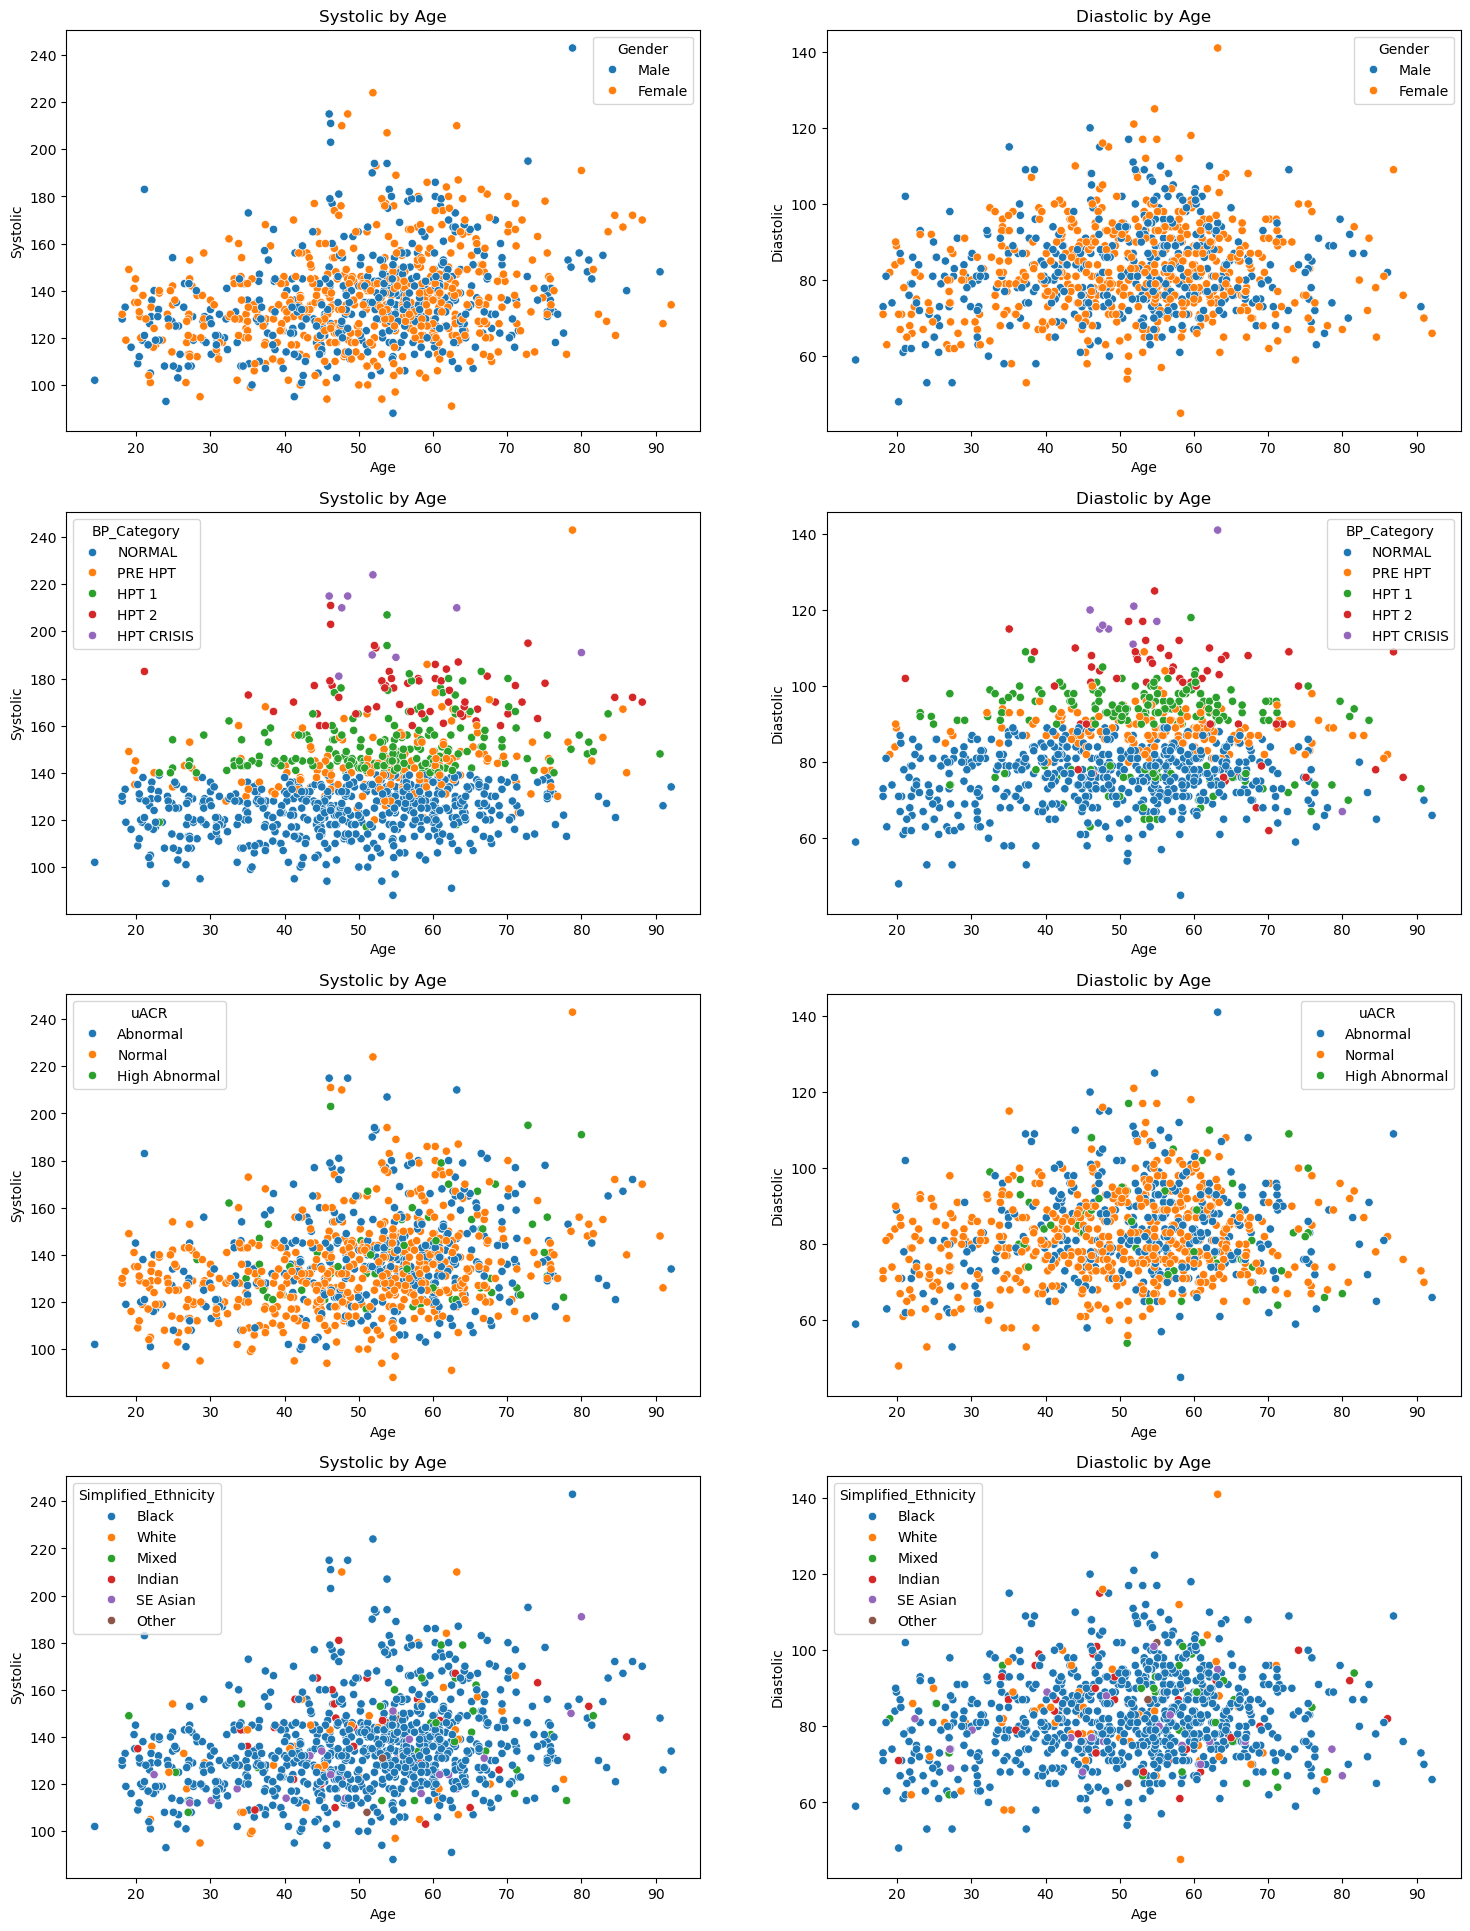

In [30]:
plt.figure(figsize = (18, 24))

plt.subplot(4, 2, 1)
sns.scatterplot(data=data, x='Age', y='Systolic', hue = 'Gender')
plt.title("Systolic by Age")

plt.subplot(4, 2, 2)
sns.scatterplot(data=data, x='Age', y='Diastolic', hue = 'Gender')
plt.title("Diastolic by Age")

plt.subplot(4, 2, 3)
sns.scatterplot(data=data, x='Age', y='Systolic', hue = 'BP_Category')
plt.title("Systolic by Age")

plt.subplot(4, 2, 4)
sns.scatterplot(data=data, x='Age', y='Diastolic', hue = 'BP_Category')
plt.title("Diastolic by Age")

plt.subplot(4, 2, 5)
sns.scatterplot(data=data, x='Age', y='Systolic', hue = 'uACR')
plt.title("Systolic by Age")

plt.subplot(4, 2, 6)
sns.scatterplot(data=data, x='Age', y='Diastolic', hue = 'uACR')
plt.title("Diastolic by Age")

plt.subplot(4, 2, 7)
sns.scatterplot(data=data, x='Age', y='Systolic', hue = 'Simplified_Ethnicity')
plt.title("Systolic by Age")

plt.subplot(4, 2, 8)
sns.scatterplot(data=data, x='Age', y='Diastolic', hue = 'Simplified_Ethnicity')
plt.title("Diastolic by Age")

%matplotlib inline
plt.show()

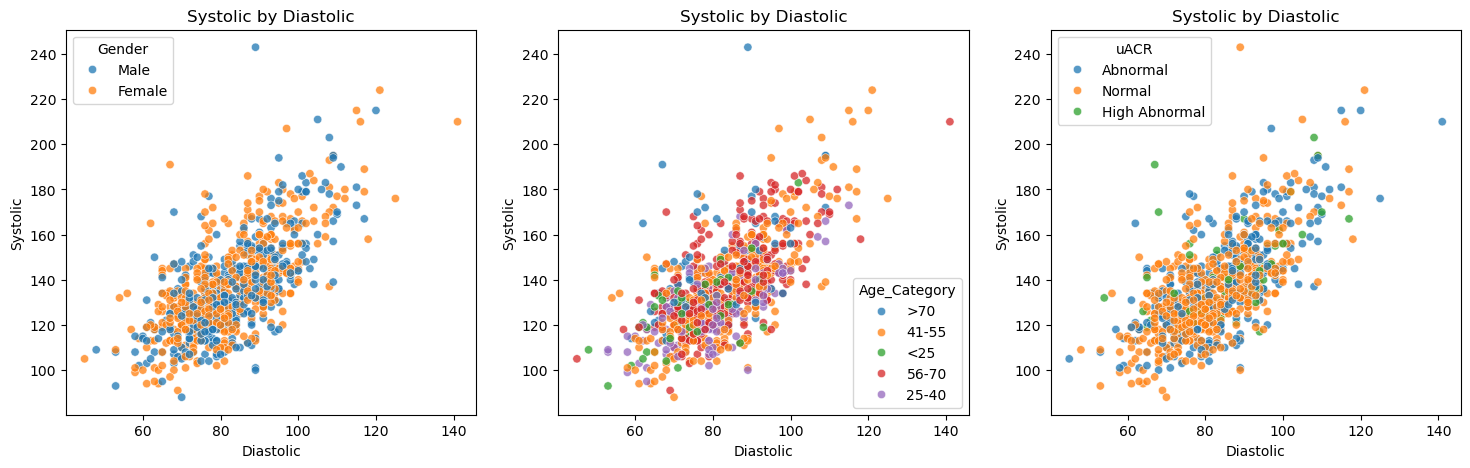

In [31]:
plt.figure(figsize = (18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='Diastolic', y='Systolic', hue = 'Gender', alpha=0.75)
plt.title("Systolic by Diastolic")

plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='Diastolic', y='Systolic', hue = 'Age_Category', alpha=0.75)
plt.title("Systolic by Diastolic")

plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x='Diastolic', y='Systolic', hue = 'uACR', alpha=0.75)
plt.title("Systolic by Diastolic")

%matplotlib inline
plt.show()

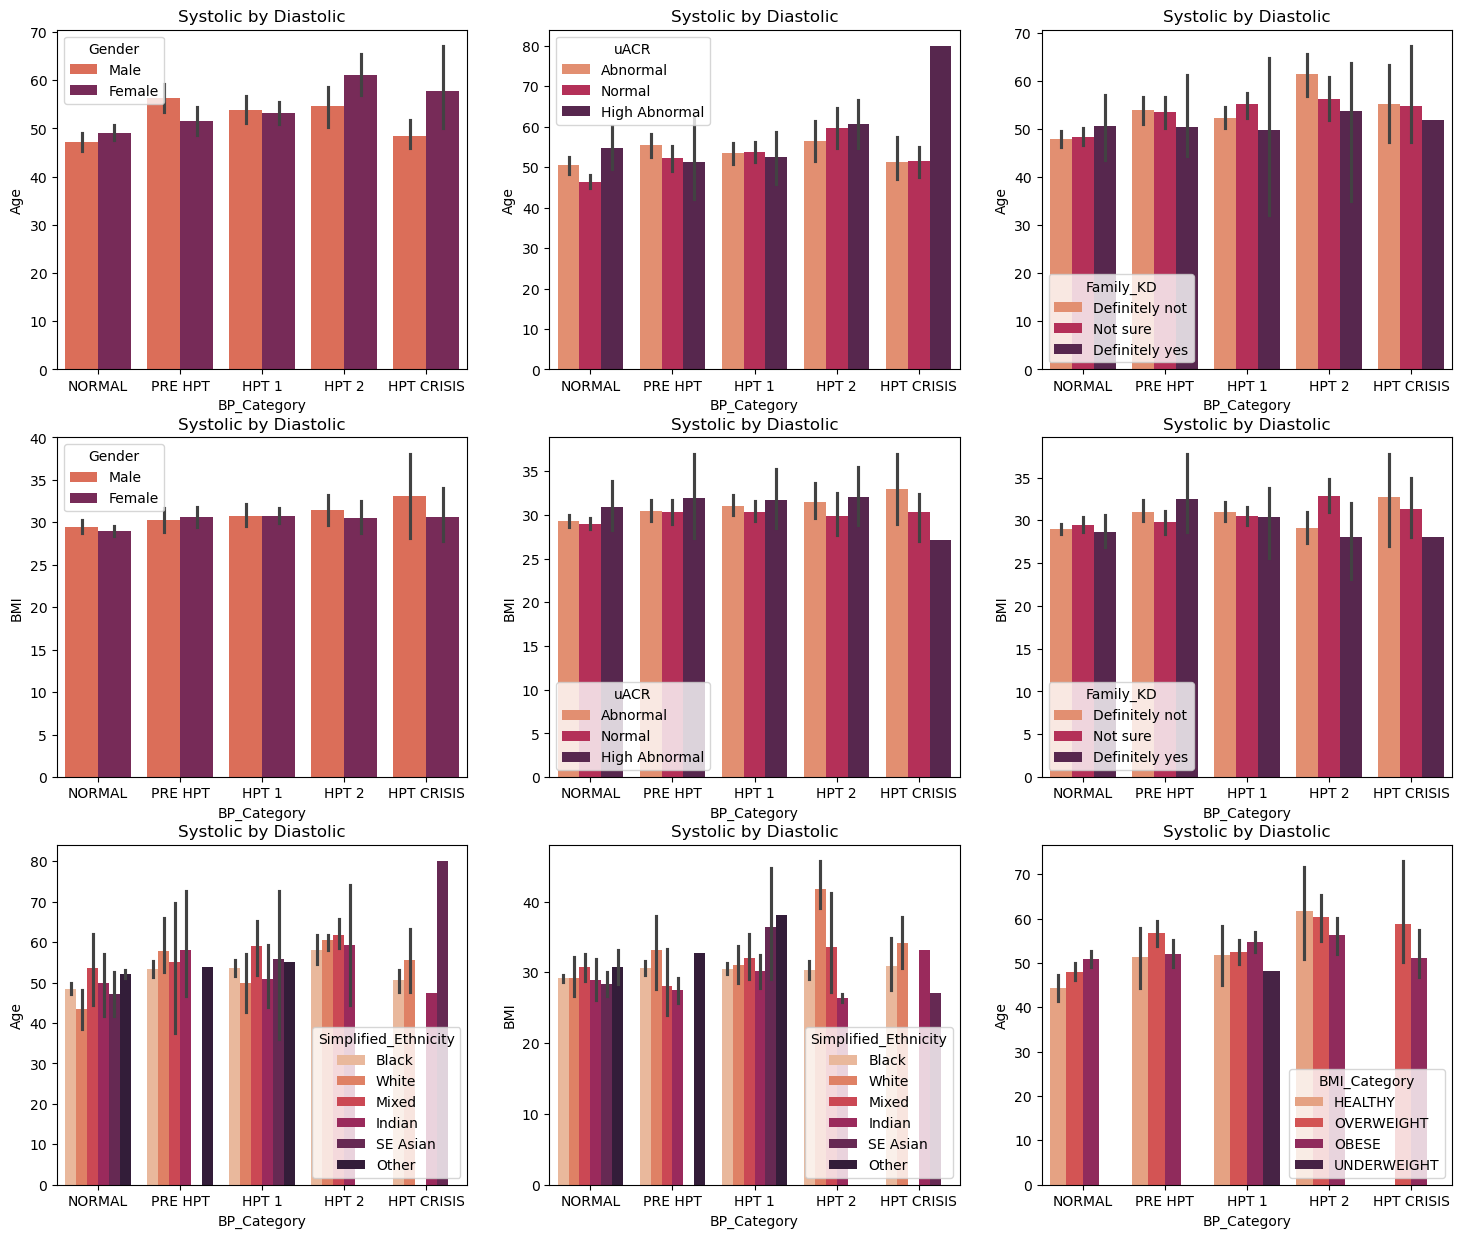

In [32]:
plt.figure(figsize = (18, 15))

plt.subplot(3, 3, 1)
sns.barplot(data=data, x='BP_Category', y='Age', palette='rocket_r', hue = 'Gender')
plt.title("Systolic by Diastolic")

plt.subplot(3, 3, 2)
sns.barplot(data=data, x='BP_Category', y='Age', palette='rocket_r', hue = 'uACR')
plt.title("Systolic by Diastolic")

plt.subplot(3, 3, 3)
sns.barplot(data=data, x='BP_Category', y='Age', palette='rocket_r', hue = 'Family_KD')
plt.title("Systolic by Diastolic")

plt.subplot(3, 3, 4)
sns.barplot(data=data, x='BP_Category', y='BMI', palette='rocket_r', hue = 'Gender')
plt.title("Systolic by Diastolic")

plt.subplot(3, 3, 5)
sns.barplot(data=data, x='BP_Category', y='BMI', palette='rocket_r', hue = 'uACR')
plt.title("Systolic by Diastolic")

plt.subplot(3, 3, 6)
sns.barplot(data=data, x='BP_Category', y='BMI', palette='rocket_r', hue = 'Family_KD')
plt.title("Systolic by Diastolic")

plt.subplot(3, 3, 7)
sns.barplot(data=data, x='BP_Category', y='Age', palette='rocket_r', hue = 'Simplified_Ethnicity')
plt.title("Systolic by Diastolic")

plt.subplot(3, 3, 8)
sns.barplot(data=data, x='BP_Category', y='BMI', palette='rocket_r', hue = 'Simplified_Ethnicity')
plt.title("Systolic by Diastolic")

plt.subplot(3, 3, 9)
sns.barplot(data=data, x='BP_Category', y='Age', palette='rocket_r', hue = 'BMI_Category')
plt.title("Systolic by Diastolic")

plt.show()

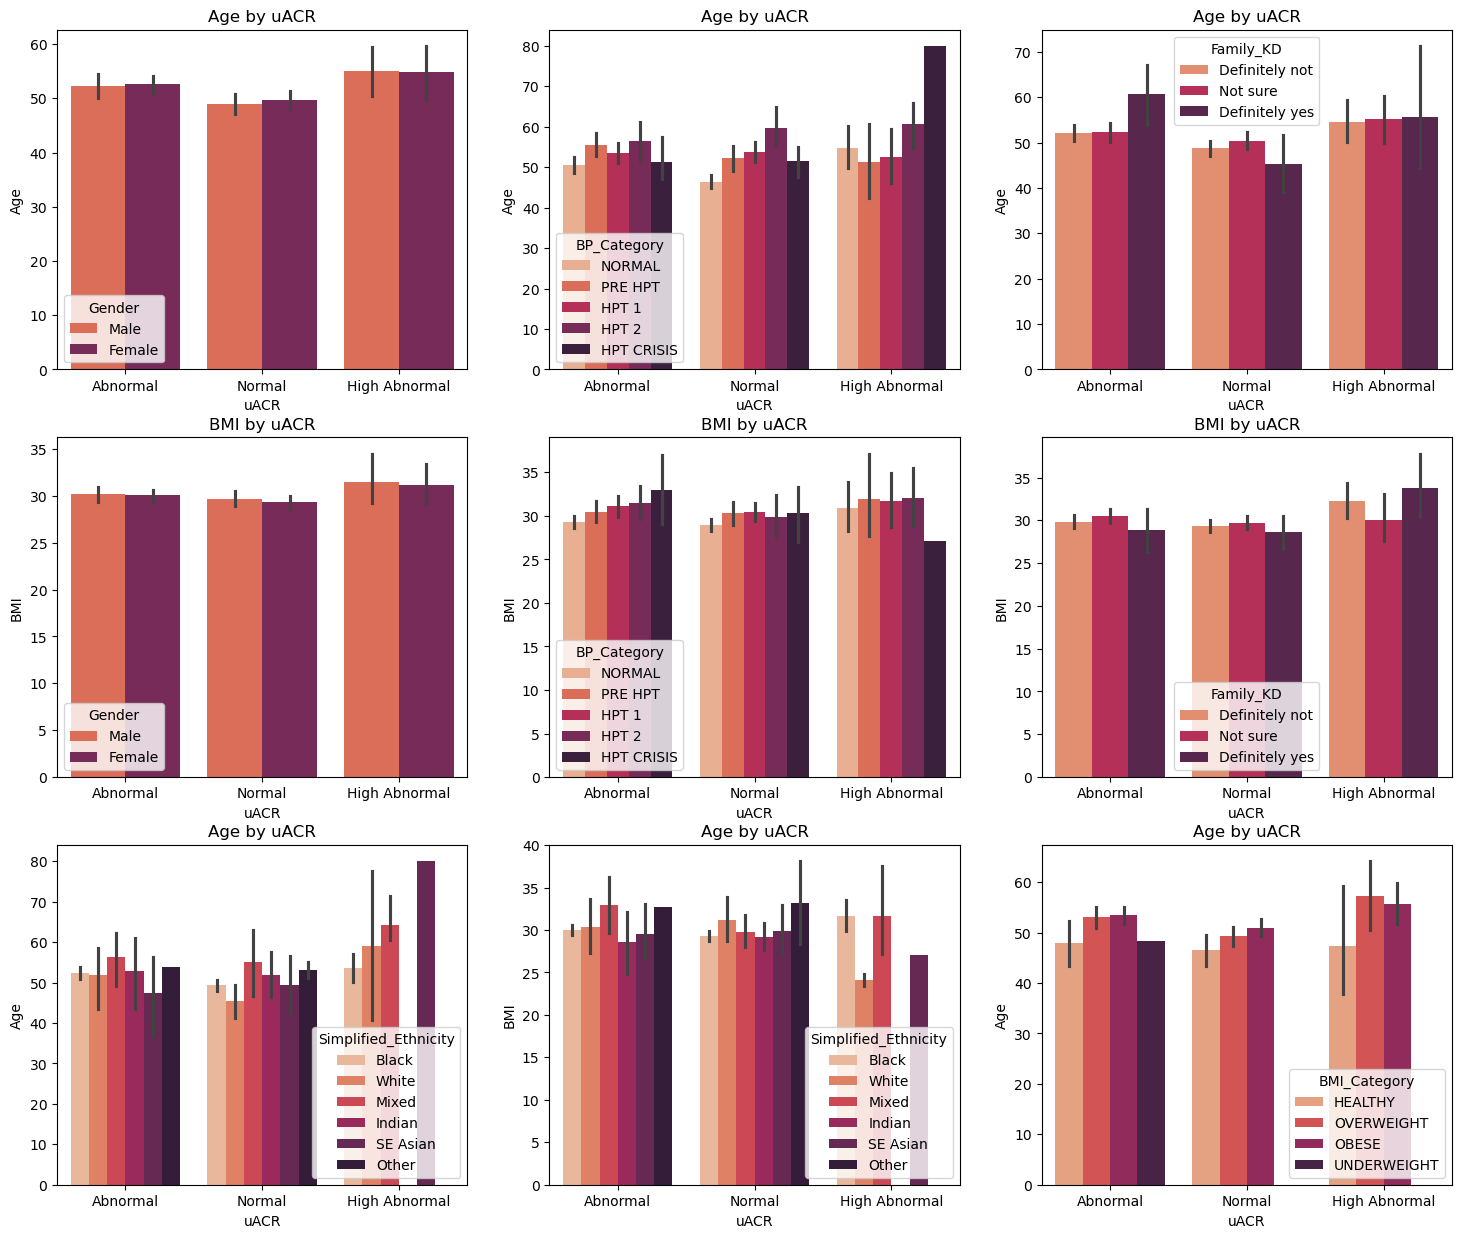

In [33]:
plt.figure(figsize = (18, 15))

plt.subplot(3, 3, 1)
sns.barplot(data=data, x='uACR', y='Age', palette='rocket_r', hue = 'Gender')
plt.title("Age by uACR")

plt.subplot(3, 3, 2)
sns.barplot(data=data, x='uACR', y='Age', palette='rocket_r', hue = 'BP_Category')
plt.title("Age by uACR")

plt.subplot(3, 3, 3)
sns.barplot(data=data, x='uACR', y='Age', palette='rocket_r', hue = 'Family_KD')
plt.title("Age by uACR")

plt.subplot(3, 3, 4)
sns.barplot(data=data, x='uACR', y='BMI', palette='rocket_r', hue = 'Gender')
plt.title("BMI by uACR")

plt.subplot(3, 3, 5)
sns.barplot(data=data, x='uACR', y='BMI', palette='rocket_r', hue = 'BP_Category')
plt.title("BMI by uACR")

plt.subplot(3, 3, 6)
sns.barplot(data=data, x='uACR', y='BMI', palette='rocket_r', hue = 'Family_KD')
plt.title("BMI by uACR")

plt.subplot(3, 3, 7)
sns.barplot(data=data, x='uACR', y='Age', palette='rocket_r', hue = 'Simplified_Ethnicity')
plt.title("Age by uACR")

plt.subplot(3, 3, 8)
sns.barplot(data=data, x='uACR', y='BMI', palette='rocket_r', hue = 'Simplified_Ethnicity')
plt.title("Age by uACR")

plt.subplot(3, 3, 9)
sns.barplot(data=data, x='uACR', y='Age', palette='rocket_r', hue = 'BMI_Category')
plt.title("Age by uACR")

%matplotlib inline
plt.show()

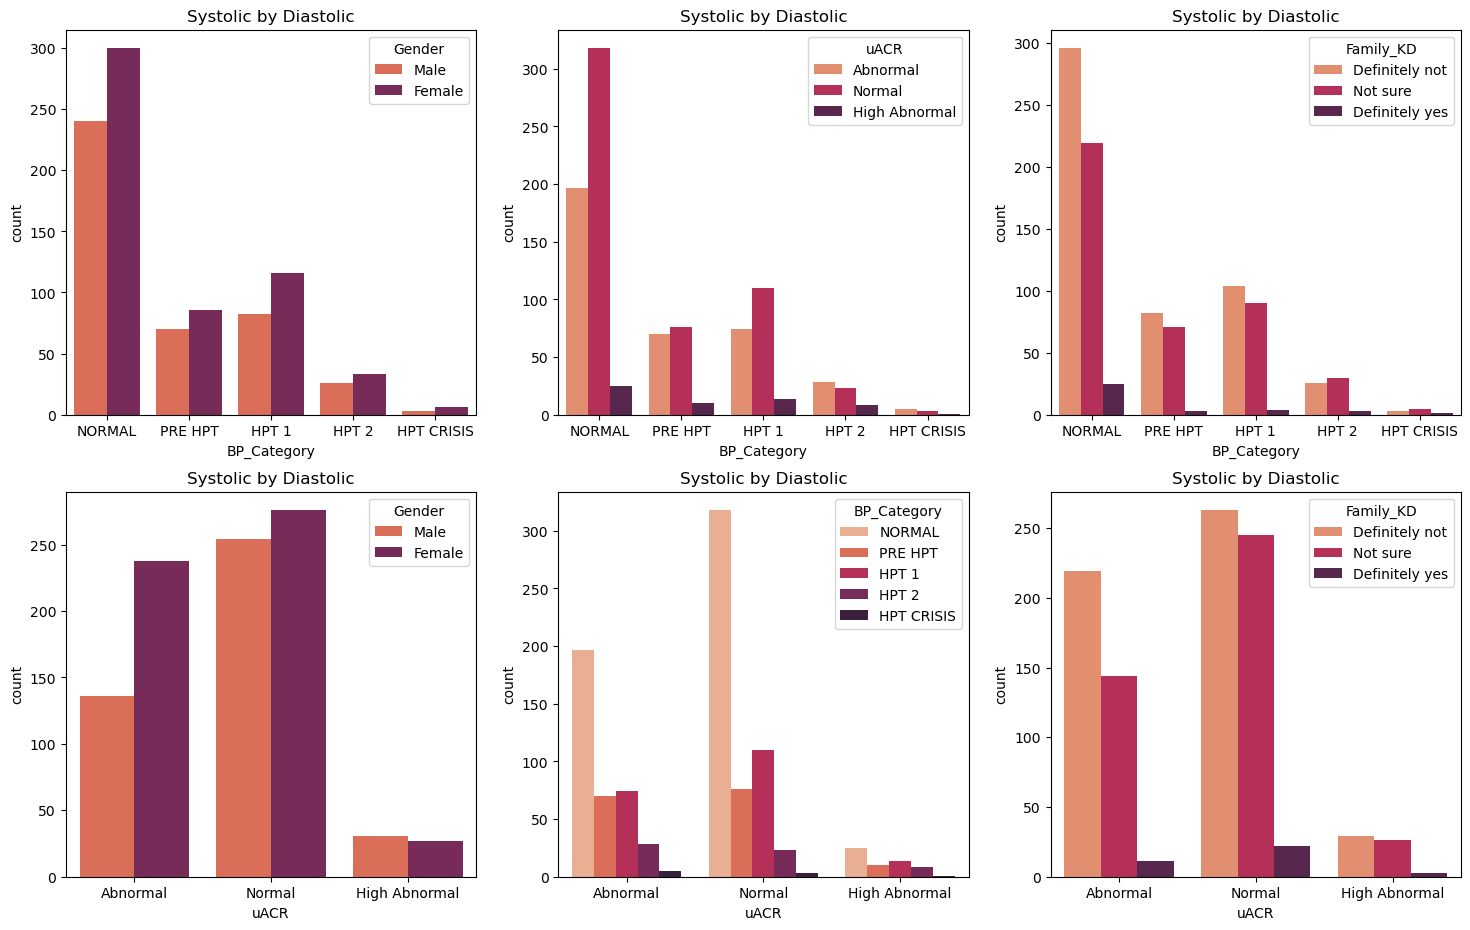

In [34]:
plt.figure(figsize = (18, 11))

plt.subplot(2, 3, 1)
sns.countplot(data=data, x='BP_Category', palette='rocket_r', hue = 'Gender')
plt.title("Systolic by Diastolic")

plt.subplot(2, 3, 2)
sns.countplot(data=data, x='BP_Category', palette='rocket_r', hue = 'uACR')
plt.title("Systolic by Diastolic")

plt.subplot(2, 3, 3)
sns.countplot(data=data, x='BP_Category', palette='rocket_r', hue = 'Family_KD')
plt.title("Systolic by Diastolic")

plt.subplot(2, 3, 4)
sns.countplot(data=data, x='uACR', palette='rocket_r', hue = 'Gender')
plt.title("Systolic by Diastolic")

plt.subplot(2, 3, 5)
sns.countplot(data=data, x='uACR', palette='rocket_r', hue = 'BP_Category')
plt.title("Systolic by Diastolic")

plt.subplot(2, 3, 6)
sns.countplot(data=data, x='uACR', palette='rocket_r', hue = 'Family_KD')
plt.title("Systolic by Diastolic")

%matplotlib inline
plt.show()

# **Building a Random Forest Classifier to Predict uACR**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn import ensemble, datasets
import scipy.stats as stats
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn import model_selection, metrics

### **Data Preprocessing**

In [36]:
data_ml = data[['Gender', 'Ethnicity', 'Simplified_Ethnicity', 'Age', 'Height', 'Weight', 'BMI', 'BMI_Category', 'Systolic', 'Diastolic', 'BP_Category', 'Has_High_BP', 'Has_Diabetes', 'Has_KD', 'Has_HD', 'BP_Meds', 'Diabetes_Meds', 'Cholesterol_Meds', 'Other_Meds', 'Family_KD', 'Abnormal_uACR']].copy()

In [37]:
#encoding data
data_ml['Gender_enc'] = data['Gender'].map({'Male' : 0, 'Female' : 1})
data_ml['BMI_Category_enc'] = data['BP_Category'].map({'HEALTHY' : 0, 'OBESE' : 1, 'OVERWEIGHT' : 2, 'UNDERWEIGHT' : 3})
data_ml['BP_Category_enc'] = data['BP_Category'].map({'NORMAL' : 0, 'PRE HPT' : 1, 'HPT 1' : 2, 'HPT 2' : 3, 'HPT CRISIS' : 4})
data_ml['Simplified_Ethnicity_enc'] = data['Simplified_Ethnicity'].map({'Black' : 0, 'White' : 1, 'Mixed' : 2, 'Indian' : 3, 'SE Asian' : 4, 'Other' : 5})
data_ml['Family_KD_enc'] = data['Family_KD'].map({'Definitely not' : 0, 'Not sure' : 1, 'Definitely yes' : 2})
data_ml['uACR'] = data['uACR'].map({'Normal' : 0, 'Abnormal' : 1, 'High Abnormal' : 2})

In [38]:
data_ml.Ethnicity = pd.factorize(data_ml['Ethnicity'])[0]

In [39]:
eth_cols = pd.get_dummies(data = data_ml['Ethnicity'], prefix = 'Ethnicity').columns.tolist()
eth_cols = ', '.join(f"'{i}'" for i in eth_cols)
s_eth_cols = pd.get_dummies(data = data_ml['Simplified_Ethnicity'], prefix = 'Simplified_Ethnicity').columns.tolist()
s_eth_cols = ', '.join(f"'{i}'" for i in s_eth_cols)

In [40]:
#make list of nominal categorical variables: Sex, RestingECG and ChestPainType
nominal_vars = ['Gender', 'Ethnicity', 'Simplified_Ethnicity', 'BMI_Category', 'BP_Category', 'Family_KD']

#apply one hot encoding to Sex, RestingECG and ChestPainType
data_ml = pd.get_dummies(data = data_ml,
                         prefix = nominal_vars,
                         columns = nominal_vars)

In [41]:
data_ml = data_ml[['Age',
                   'Gender_enc',
                   'Simplified_Ethnicity_Black', 'Simplified_Ethnicity_Indian', 'Simplified_Ethnicity_Mixed', 'Simplified_Ethnicity_SE Asian', 'Simplified_Ethnicity_White',
                   'Height', 'Weight',
                   'Systolic', 'Diastolic',
                   'Has_High_BP', 'Has_Diabetes', 'Has_KD', 'Has_HD',
                   'BP_Meds', 'Diabetes_Meds', 'Cholesterol_Meds',
                   'Family_KD_enc',
                   'Abnormal_uACR']]

In [42]:
#splitting  data into independent and dependent variables
X = data_ml.drop('Abnormal_uACR', axis=1)
y = data_ml['Abnormal_uACR']

#spliting data into test and train sets. Train set is 75% of the data
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, train_size = 0.75, random_state=42)

In [43]:
X_train.head()

Age  Gender_enc  ...  Cholesterol_Meds  Family_KD_enc
309  53.6           1  ...             False              1
29   60.1           1  ...             False              2
55   43.3           1  ...             False              0
482  31.3           0  ...             False              1
332  58.9           1  ...             False              0

[5 rows x 19 columns]

### **Model Training**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

### **Model Evaluation**

In [45]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"\nClassification Report:\n", classification_rep)

Accuracy: 0.65

Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.76      0.71       136
        True       0.62      0.50      0.56       105

    accuracy                           0.65       241
   macro avg       0.65      0.63      0.64       241
weighted avg       0.65      0.65      0.65       241



### **XGBoost**

In [71]:
import xgboost as xgb

In [89]:
data_xg = data[['Gender', 'Simplified_Ethnicity', 'Age', 'Height', 'Weight', 'BMI', 'BMI_Category', 'Systolic', 'Diastolic', 'BP_Category', 'Has_High_BP', 'Has_Diabetes', 'Has_KD', 'Has_HD', 'BP_Meds', 'Diabetes_Meds', 'Cholesterol_Meds', 'Other_Meds', 'Family_KD', 'uACR', 'Abnormal_uACR']].copy()

In [90]:
data_xg['uACR'] = data_xg['uACR'].map({'Normal' : 0, 'Abnormal' : 0, 'High Abnormal' : 1})

In [91]:
#splitting  data into independent and dependent variables
X1 = data_xg.drop('uACR', axis=1)
y1 = data_xg['uACR']

In [92]:
#converting categorical columns
X1['Gender'] = X1['Gender'].astype('category')
X1['Simplified_Ethnicity'] = X1['Simplified_Ethnicity'].astype('category')
X1['Family_KD'] = X1['Family_KD'].astype('category')
X1['BP_Category'] = X1['BP_Category'].astype('category')
X1['BMI_Category'] = X1['BMI_Category'].astype('category')

In [93]:
X1 = X1[['Systolic', 'Diastolic', 'Simplified_Ethnicity']]

In [94]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Oversample minority class
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_over, y_over = oversample.fit_resample(X1, y1)

In [95]:
#splitting into test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_over, y_over, test_size=0.25, random_state=42)

In [96]:
#converting dataset to DMatrix
xgb_train = xgb.DMatrix(X_train1, y_train1, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test1, y_test1, enable_categorical=True)


In [97]:
#creating XGBoost model
n=100
params = {
	'objective': 'binary:logistic',
	'max_depth': 10,
	'learning_rate': 0.01,
}

model = xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)

In [98]:
#evaluating model accuracy
preds = model.predict(xgb_test)
preds = preds.astype(int)
accuracy= accuracy_score(y_test1, preds)
print('Accuracy of the model is:', accuracy*100)

Accuracy of the model is: 49.336283185840706
